# SARS-COV-2  (COVID-19) Analysis & Prediction

##### Author: Dionisis Mastavrslis
     - Email:    dionisis.mastavralis@gmail.com
     - GitHub:   https://github.com/mastavralis/dm-covid-19-greece
     - License:  About the Analysis and Prediction Model: All Rights Reserved.

###### About the DATA
- Data Authority: JOHNS HOPKINS UNIVERSITY AND MEDICINE
- Data Source: https://github.com/CSSEGISandData/COVID-19
- Data renewal frequency: Daily at 23:59 by JOHNS HOPKINS


+ Data Prediction Methods
    - Linear Regression
    - Polynomial Rregression

###### Notes:
* The analysis is customised to read, analyze and predict data only for Greece. However, changing the "country" parameter on In [139] the Model can fetch and analyze data for other countries as well, but with a probability of wrong data visualization or a
malfunction of the Model. Thus, it is not recommended by the author to perform analysis for other countries but Greece.

###### Daily Reports
- For Reports & Predictions history, check the Readme.md File of the Repo.
- Current Report [2020-04-05](https://github.com/mastavralis/dm-covid-19-greece/blob/master/5-4-2020-report/main.md)

In [35]:
# import all the required libs
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# To loop through all the csv files in the csse_covid_19_daily_reports folder
import glob
from __future__ import absolute_import, division, print_function, unicode_literals
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Create the Data frame from the Data set

In [36]:
# Read all the csv files from the daily report folder
files = glob.glob('../COVID-19_DATA/csse_covid_19_data/csse_covid_19_daily_reports/*.csv')

daily_reports = []

for fname in files:
    # create a dataframe for every csv
    df = pd.read_csv(fname, index_col=None, header=0)
    # append dataframes into a new DF
    daily_reports.append(df)

# Concatenate the dataframes
new_df = pd.concat(daily_reports, axis=0, ignore_index=True, sort=False)

# Correct the Country/Region and Country_Region column issue into a new column 'Country'
new_df.loc[new_df['Country_Region'].isnull() == True, 'Country'] = new_df['Country/Region']
new_df.loc[new_df['Country/Region'].isnull() == True, 'Country'] = new_df['Country_Region']
# Correct Last Update columns
new_df.loc[new_df['Last Update'].isnull() == True, 'Date'] = new_df['Last_Update']
new_df.loc[new_df['Last_Update'].isnull() == True, 'Date'] = new_df['Last Update']

### Remove unnecessary columns

In [37]:
new_df.drop(['Admin2', 'Combined_Key', 'Country/Region', 
             'Country_Region', 'FIPS', 'Lat', 
             'Latitude', 'Long_', 'Longitude', 
             'Province/State', 'Province_State'], axis=1, inplace=True)

### Create DataFrame by country for Specific Analysis
* About the compatible Countries, please advise the notes section of this Notebook

#### Confirmed Cases
* Greece is the default country. Changing country might break the anaysis model.

In [38]:
country = 'Greece'
country_df = new_df.loc[new_df['Country'] == country]
date_time = pd.to_datetime(country_df['Date'])
# Remove the year from the DataFrme
# months_only = date_time
#months_only = months_only.astype(str).str.replace("2020-", "").str.split().str[0]

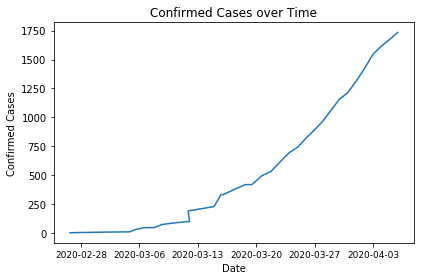

In [39]:
plt.xlabel('Date')
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases over Time")
# plt.plot(country_df['Confirmed'])
plt.plot(date_time, country_df['Confirmed'])
#set parameters for tick labels
# plt.xticks(date_time, [str(i) for i in country_df['Confirmed'] ], rotation=90)
plt.tick_params(axis='x', which='major', labelsize=9)
plt.tight_layout()

### Confrimed Cases Today

In [40]:
current_day = country_df.iloc[[-1,]]
print("Confirmed Cases Today {0}:".format(current_day['Confirmed'].values[0]))

Confirmed Cases Today 1735.0:


### Deaths Today

In [41]:
current_day = country_df.iloc[[-1,]]
print("Deaths Today {0}:".format(current_day['Deaths'].values[0]))

Deaths Today 73.0:


### Deaths and Death Ratio

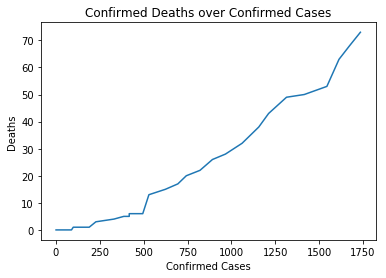

In [42]:
plt.xlabel('Confirmed Cases')
plt.ylabel("Deaths")
plt.title("Confirmed Deaths over Confirmed Cases")
plt.plot(country_df['Confirmed'], country_df['Deaths'])
plt.show()

### Mortality Rate

In [43]:
# Death Ratio
# Always get the last Row of the dataframe
deaths = country_df.loc[country_df.index[-1], "Deaths"]
cases = country_df.loc[country_df.index[-1], "Confirmed"]
dr = round((deaths / cases) * 100, 2)
print('Mortality Rate is: ', dr, '%')

Mortality Rate is:  4.21 %


### Cases vs Deaths

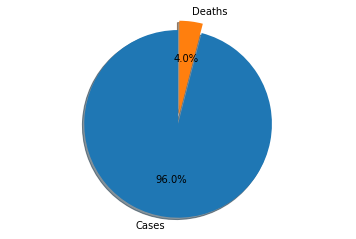

In [44]:
# Pie Chart to show the Mortality rate
labels = ["Cases", "Deaths"]
sizes = [cases, deaths]
explode = (0, 0.1) # only "explode" in the seconds slice "Deaths"
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Active Cases vs Recovered

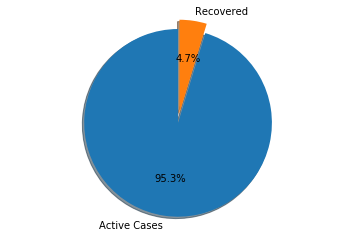

In [45]:
recovered = country_df.loc[country_df.index[-1], "Recovered"]
active = country_df.loc[country_df.index[-1], "Active"]
#
labels = ["Active Cases", "Recovered"]
sizes = [active, recovered]
explode = (0, 0.1) # only "explode" in the seconds slice "Deaths"
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Show the Daily Cases

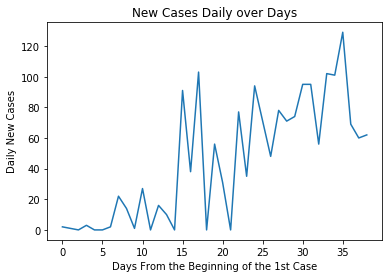

In [46]:
# In case we want to added to the country_df DataFrame
daily_cases = [y - x for x,y in zip(country_df['Confirmed'],country_df['Confirmed'][1:])]
# Append on more record in orde to have the same size and shape
# daily_cases.append(0)

plt.xlabel('Days From the Beginning of the 1st Case')
plt.ylabel('Daily New Cases')
plt.title("New Cases Daily over Days")
plt.plot(daily_cases)
plt.show()

### Perform a very simple Prediction With Machine Learning
- Since Epidemics are not Linear, we are using Polynomial Regression

#### Fit Cases Model

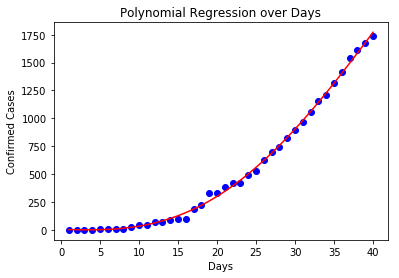

In [47]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 

# Days
X = np.arange(1, len(daily_cases)+2).reshape(-1,1)
y = country_df['Confirmed']

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 

poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression over Days') 
plt.xlabel('Days') 
plt.ylabel('Confirmed Cases')
plt.show()

#### Predict Cases Model

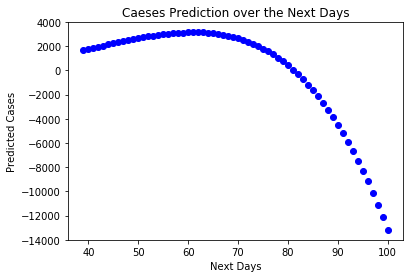

In [48]:
days = np.arange(39, 101)

pred = []
next_days = []

for i in days:
    next_days.append( lin2.predict(poly.fit_transform([[i]])) )


X = days
y = next_days

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue')

plt.title('Caeses Prediction over the Next Days') 
plt.xlabel('Next Days')
plt.ylabel('Predicted Cases')
plt.show()

###### Predict Cases for Tomorrow (or for a specific Day)

In [49]:
# Predicting a new result with Polynomial Regression
# "next_day" is for today otherwise use an interget number greater tha today day
next_day = len(country_df)+1
prediction = lin2.predict(poly.fit_transform([[next_day]]))
today = datetime.date.today()
# Print the Predicted number rounded
print("Total Cases Prediction for today {0} is {1}".format(today,round(prediction[0])))

Total Cases Prediction for today 2020-04-06 is 1865.0


In [50]:
prediction = lin2.predict(poly.fit_transform([[next_day+1]]))
tomorrow = today + datetime.timedelta(days=1)
# Print the Predicted number rounded
print("Total Cases Prediction for tomorrow {0} is {1}".format(tomorrow,round(prediction[0])))

Total Cases Prediction for tomorrow 2020-04-07 is 1958.0


#### Fit Deaths Model

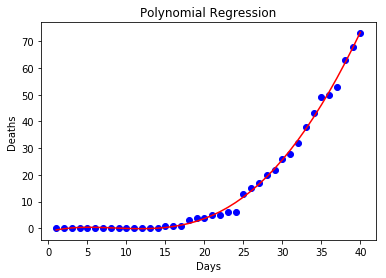

In [51]:
# Days
X = np.arange(1, len(daily_cases)+2).reshape(-1,1)
y = country_df['Deaths']

poly = PolynomialFeatures(degree = 4) 
X_poly = poly.fit_transform(X) 

poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue') 
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('Days') 
plt.ylabel('Deaths')
plt.show()

#### Predict Deaths Model

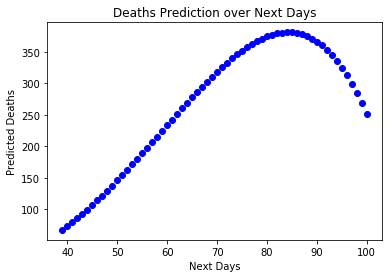

In [52]:
days = np.arange(39,101)
pred = []
next_days = []

for i in days:
    next_days.append( lin2.predict(poly.fit_transform([[i]])) )


X = days
y = next_days

# Visualising the Polynomial Regression results 
plt.scatter(X, y, color = 'blue')

plt.title('Deaths Prediction over Next Days') 
plt.xlabel('Next Days')
plt.ylabel('Predicted Deaths')
plt.show()

###### Predict Deaths for Tomorrow (or for a specific Day)

In [53]:
# Predicting a new result with Polynomial Regression
# "next_day" is for today otherwise use an interget number greater tha today day
next_day = len(country_df)+1
prediction = lin2.predict(poly.fit_transform([[next_day]]))
today = datetime.date.today()
# Print the Predicted number rounded
print("Total Deaths Prediction for today {0} is {1}".format(today,round(prediction[0])))

Total Deaths Prediction for today 2020-04-06 is 80.0


In [54]:
prediction = lin2.predict(poly.fit_transform([[next_day+1]]))
tomorrow = today + datetime.timedelta(days=1)
print("Total Deaths Prediction for tomorrow {0} is {1}".format(tomorrow,round(prediction[0])))

Total Deaths Prediction for tomorrow 2020-04-07 is 86.0
